In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.special import smirnov

from pandas.api.types import CategoricalDtype
from datetime import datetime, timedelta

# 1. Collect data 

In the figure 2 of the paper, EgoTimelines file is considered and it is in txt format. We can use pandas read_csv function to read the data, and set the seperator as '\t'. However, among the 17,244 active users, only some of them have the information of the UTC-offset. EgoAlterProfiles file should then be used in order to select these users with the UTC-offset information.

In [118]:
#Read dataset
EgoTimelines = pd.read_csv('EgoTimelines.txt', delimiter="\t", encoding = "ISO-8859-1")

#Read the file as a csv file
EgoAlterProfiles=pd.read_csv("EgoAlterProfiles.txt",delimiter="\t")

In [124]:
#Select only users with utc_offset information
EgoAlterProfiles = EgoAlterProfiles.loc[EgoAlterProfiles['IsEgo'] == True]
EgoAlterProfiles = EgoAlterProfiles[~EgoAlterProfiles['utc_offset'].isna()]

EgoAlterProfiles


,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at,protected
1,2,True,2.0,8,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False
6,7,True,17.0,71,1034.0,-10800.0,pt,Thu Nov 11 22:05:15 +0000 2010,True
8,9,True,26.0,16,6.0,-10800.0,en,Sun Feb 14 10:49:28 +0000 2010,False
11,12,True,36.0,260,257.0,-18000.0,en,Thu Aug 12 04:54:24 +0000 2010,True
20,21,True,14.0,21,473.0,-14400.0,en,Thu Apr 30 16:29:40 +0000 2009,False
...,...,...,...,...,...,...,...,...,...
33938,33939,True,28.0,40,11.0,-18000.0,es,Mon Aug 11 22:44:22 +0000 2014,False
33942,33943,True,15.0,46,12.0,0.0,ru,Sat Jun 14 08:11:33 +0000 2014,False
33967,33968,True,590.0,63,77.0,-14400.0,en,Sun Oct 20 19:02:07 +0000 2013,False
33979,33980,True,120.0,103,409.0,7200.0,tr,Fri Jun 14 20:04:11 +0000 2013,False


In [121]:
#Original number of users in EgoTimelines file
len(EgoTimelines.groupby('id'))

17244

In [129]:
#Select in the EgoTimelines only the users that have the UTC offset information in the EgoAlterProfiles file
EgoTimelines.loc[EgoTimelines['egoID'].isin(EgoAlterProfiles['ID']), 'ID']= EgoTimelines['egoID']
EgoTimelines_with_utc = EgoTimelines[~EgoTimelines['Valid ID'].isna()]
EgoTimelines_with_utc 

,replyto_userid,retweeted_userid,id,tweetid,created_at,hashtags,urls,mentions_ids,retweet_count,egoID,retweetedUserID,replytoUserID,metionID,Valid ID,ID
9,NaN,NaN,60705288,266183173514354689,Wed Nov 07 14:19:48 +0000 2012,NaN,http://t.co/f4iUVq3i,NaN,0,2,NaN,NaN,NaN,2.0,2.0
10,NaN,NaN,60705288,171568792365830144,Mon Feb 20 12:16:02 +0000 2012,NaN,NaN,NaN,0,2,NaN,NaN,NaN,2.0,2.0
11,NaN,NaN,60705288,265700869520101376,Tue Nov 06 06:23:18 +0000 2012,NaN,http://t.co/HPBDRag6,NaN,0,2,NaN,NaN,NaN,2.0,2.0
12,NaN,NaN,60705288,2877149834,Mon Jul 27 20:48:55 +0000 2009,NaN,NaN,NaN,0,2,NaN,NaN,NaN,2.0,2.0
13,NaN,NaN,60705288,171567834793656320,Mon Feb 20 12:12:14 +0000 2012,NaN,http://t.co/2ElP3Ghw,NaN,0,2,NaN,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701913,NaN,1.557448e+09,1960007076,389641224799682560,Mon Oct 14 06:38:01 +0000 2013,NaN,NaN,1960007076,1,33986,1449103.0,NaN,33986,33986.0,33986.0
4701914,1.581156e+09,NaN,1960007076,389644007493484544,Mon Oct 14 06:49:05 +0000 2013,NaN,NaN,NaN,0,33986,NaN,1739139.0,NaN,33986.0,33986.0
4701915,1.581156e+09,NaN,1960007076,389644062241746945,Mon Oct 14 06:49:18 +0000 2013,NaN,NaN,2517906421,0,33986,NaN,1739139.0,NaN,33986.0,33986.0
4701916,1.581156e+09,NaN,1960007076,389644128213934081,Mon Oct 14 06:49:34 +0000 2013,NaN,NaN,NaN,0,33986,NaN,1739139.0,NaN,33986.0,33986.0


In [203]:
#Merge the two dataframe based on the ego ID
all_data = pd.merge(EgoTimelines , EgoAlterProfiles , on='ID')

In [415]:
#Number of users EgoTimelines that have utc offset 
len(all_data.groupby('id'))

4222

# 2. Visualize data

Now that the collection of the adequate data has been done, the graphs of the number of tweets and number of users as a function of hour can be plotted. 
The column of the date and time of tweet should be used in order to plot as a function of hour and day.

In [401]:
#Convert the date
df= pd.to_datetime(all_data['created_at_x'].astype(str), format='%a %b %d %H:%M:%S %z %Y')

In [420]:
#Convert the datetime to dataframe
df= pd.DataFrame(df)

#Add the utc_offset information 
df['utc']= all_data['utc_offset']

#Add the user_id and tweetid and the name of the posting day to the dataframe df
df['User_id'] = all_data['id']
df['Tweet_id'] = all_data['tweetid']


In [421]:
len(df.groupby('User_id').count())

4222

In order to add the UTC offset to the date of tweeting, the value of the offset must be converted into hours.
Then if these hours are greater than 24, 1 day should be added to the date and the remaining hours should be added to the date. If the hours are positive and less than 1 day, they should be added to the date.
If the hours are smaller than 24, 1 day should be substracted from the date as well as the remaining hours.
Finally, if the hours are negative but less than 24 (so less than 1 day), only those hours should be substracted from the date.


In [422]:
def utc(offset,date):
    try:
        #Convert utc offset to hours
        hour = offset / 3600
        
        #1st condition that requires adding 1 day and remaining hours to the date
        if hour>=24:
                              
            date_new =  date + pd.Timedelta(days=1)
            hour = hour-24
            date_new  =  date +  pd.Timedelta(hours=hour)
            return date_new
        
        #2nd condition that requires adding only the hours to the date
        if(hour <24) & (hour >= 0 ):

            date_new  =  date +  pd.Timedelta(hours=hour)
            return date_new
        #3rd condition that requires substracting only the hours from the date
        elif (hour <0) & (hour > -24):
            
            hour = - hour  
            date_new  =  date -  pd.Timedelta(hours=hour)
            return date_new
        #Last condition that requires substracting 1 day and the remaining hours from the date
        elif hour <= -24:
            date_new  =  date - pd.Timedelta(days=1)
            hour = - hour - 24  
            date_new  =  date -  pd.Timedelta(hours=hour)
            return date_new
        
    except ValueError:
        date_new = None
        return date_new

In [423]:
#Create a new date of the tweets by adding its utc offset information to the original date
df['New date'] = np.array([utc(i,j) for i , j in zip( df.utc, df.created_at_x)] )


In [425]:
df['New day'] = df['New date'].dt.day_name()

#Change the naming of the day to get the same abbreviation as the one shown in the paper

df["New day"].replace({"Sunday": "Sun", 
                       "Monday": "Mon", 
                       "Tuesday": "Tue", 
                       "Wednesday": "Wed", 
                       "Thursday": "Thu", 
                       "Friday": "Fri", 
                       "Saturday": "Sat"}, inplace=True)

In [426]:
#Change the order of the days to get the same order as the one shown in the paper
cats= ['Sun', 'Mon', 'Tue', 'Wed','Thu', 'Fri', 'Sat']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['New day'] = df['New day'].astype(cat_type)
df

,created_at_x,utc,User_id,Tweet_id,New date,New day
0,2012-11-07 14:19:48+00:00,-14400.0,60705288,266183173514354689,2012-11-07 10:19:48+00:00,Wed
1,2012-02-20 12:16:02+00:00,-14400.0,60705288,171568792365830144,2012-02-20 08:16:02+00:00,Mon
2,2012-11-06 06:23:18+00:00,-14400.0,60705288,265700869520101376,2012-11-06 02:23:18+00:00,Tue
3,2009-07-27 20:48:55+00:00,-14400.0,60705288,2877149834,2009-07-27 16:48:55+00:00,Mon
4,2012-02-20 12:12:14+00:00,-14400.0,60705288,171567834793656320,2012-02-20 08:12:14+00:00,Mon
...,...,...,...,...,...,...
2995491,2013-10-14 06:38:01+00:00,10800.0,1960007076,389641224799682560,2013-10-14 09:38:01+00:00,Mon
2995492,2013-10-14 06:49:05+00:00,10800.0,1960007076,389644007493484544,2013-10-14 09:49:05+00:00,Mon
2995493,2013-10-14 06:49:18+00:00,10800.0,1960007076,389644062241746945,2013-10-14 09:49:18+00:00,Mon
2995494,2013-10-14 06:49:34+00:00,10800.0,1960007076,389644128213934081,2013-10-14 09:49:34+00:00,Mon


In [427]:
len(df.groupby('User_id').count())

4222

Text(0.5, 1.0, '(B)')

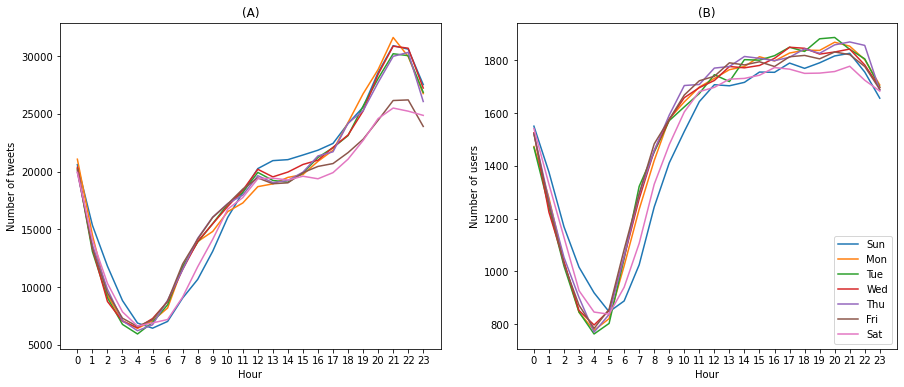

In [429]:
# plot data
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

#Get the x axis with ticks after each hour
x_ticks = np.arange(0, 24, 1)
ax1.set_xticks(x_ticks)
ax2.set_xticks(x_ticks)

#Change the name of the New day column in order not to have it on the p
df.rename(columns={'New day': ''}, inplace=True)
#Plot the number of tweets per hour by counting the number of tweets in each hour
#df.groupby([df['New date'].dt.hour, 'New day'])['Tweet_id'].count().unstack().plot(ax=ax1) 

df.groupby([df['New date'].dt.hour, ''])['Tweet_id'].count().unstack().plot(ax=ax1)
#Plot the number of users per hour by counting the unique number of users in each hour
#df.groupby([df['New date'].dt.hour, 'New day'])['User_id'].nunique().unstack().plot(ax=ax2)

df.groupby([df['New date'].dt.hour, ''])['User_id'].nunique().unstack().plot(ax=ax2)
#Show the legend only in the second plot
ax1.get_legend().remove()

#Label the axes
ax1.set_ylabel('Number of tweets')
ax2.set_ylabel('Number of users')
ax1.set_xlabel('Hour')
ax2.set_xlabel('Hour')

ax1.set_title('(A)')
ax2.set_title('(B)')